1. Import

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#load dataset
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [32]:
counts = df['RainTomorrow'].value_counts()
minority_class = counts['Yes']
majority_class = counts['No']
minority_class, majority_class

(31877, 110316)

In [33]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

((145460, 23), None)

In [34]:
df.dropna(subset='RainTomorrow', inplace=True)

In [35]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [36]:
cate_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

In [37]:
df[cate_cols].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [38]:
df[cate_cols].nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [39]:
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [41]:
cate_cols.remove('Date')
num_cols_add = ['Year', 'Month', 'Day']
for col in num_cols_add:
    num_cols.append(col)

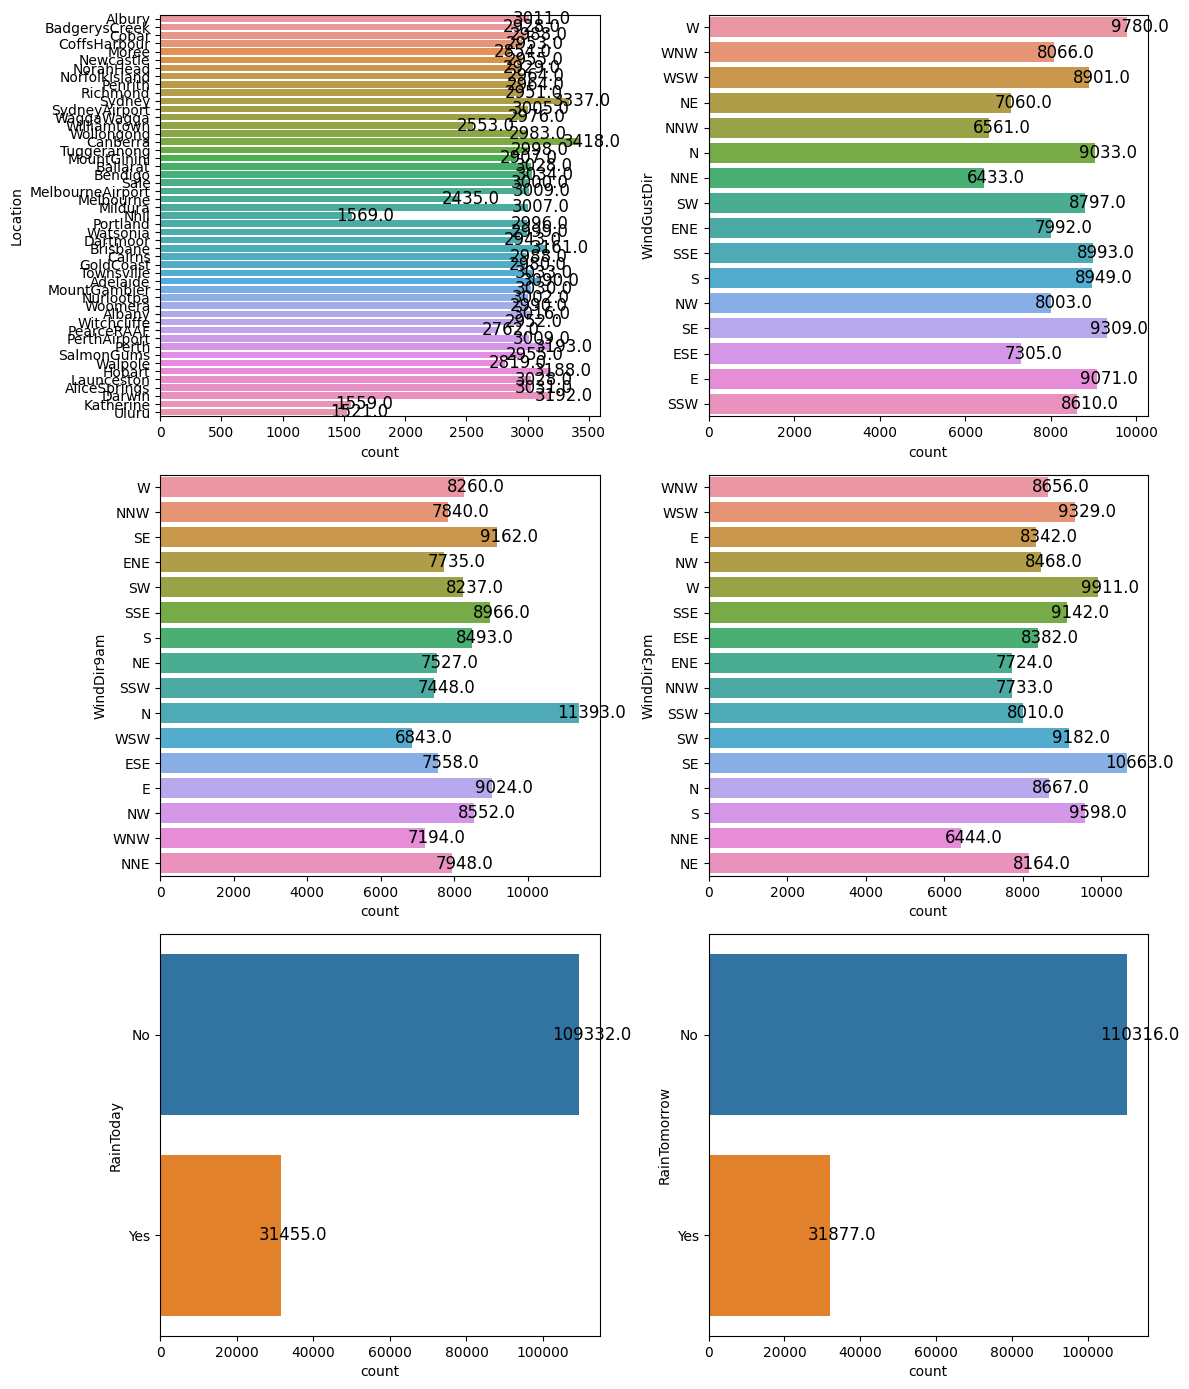

In [42]:
fig, axes = plt.subplots(3, 2, figsize=(12, 14))

axes = axes.flatten()

for i, col in enumerate(cate_cols):
    ax = axes[i]
    sns.countplot(data=df, y=col, ax=ax)
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', fontsize=12, color='black', xytext=(9, 0),
                    textcoords='offset points')

plt.tight_layout()

plt.show()

In [43]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [44]:
df[num_cols].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

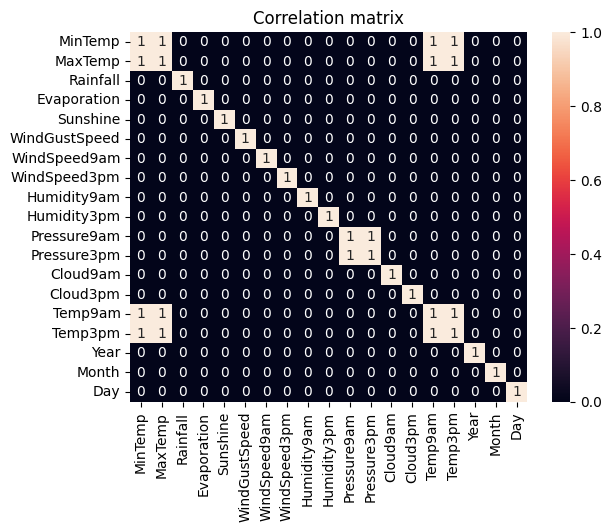

In [45]:
sns.heatmap(df[num_cols].corr() > 0.7, annot=True, fmt='d')
plt.title("Correlation matrix")
plt.show()

In [46]:
num_cols_drop = ['MinTemp','Pressure9am','Temp9am']
for col in num_cols_drop:
    num_cols.remove(col)

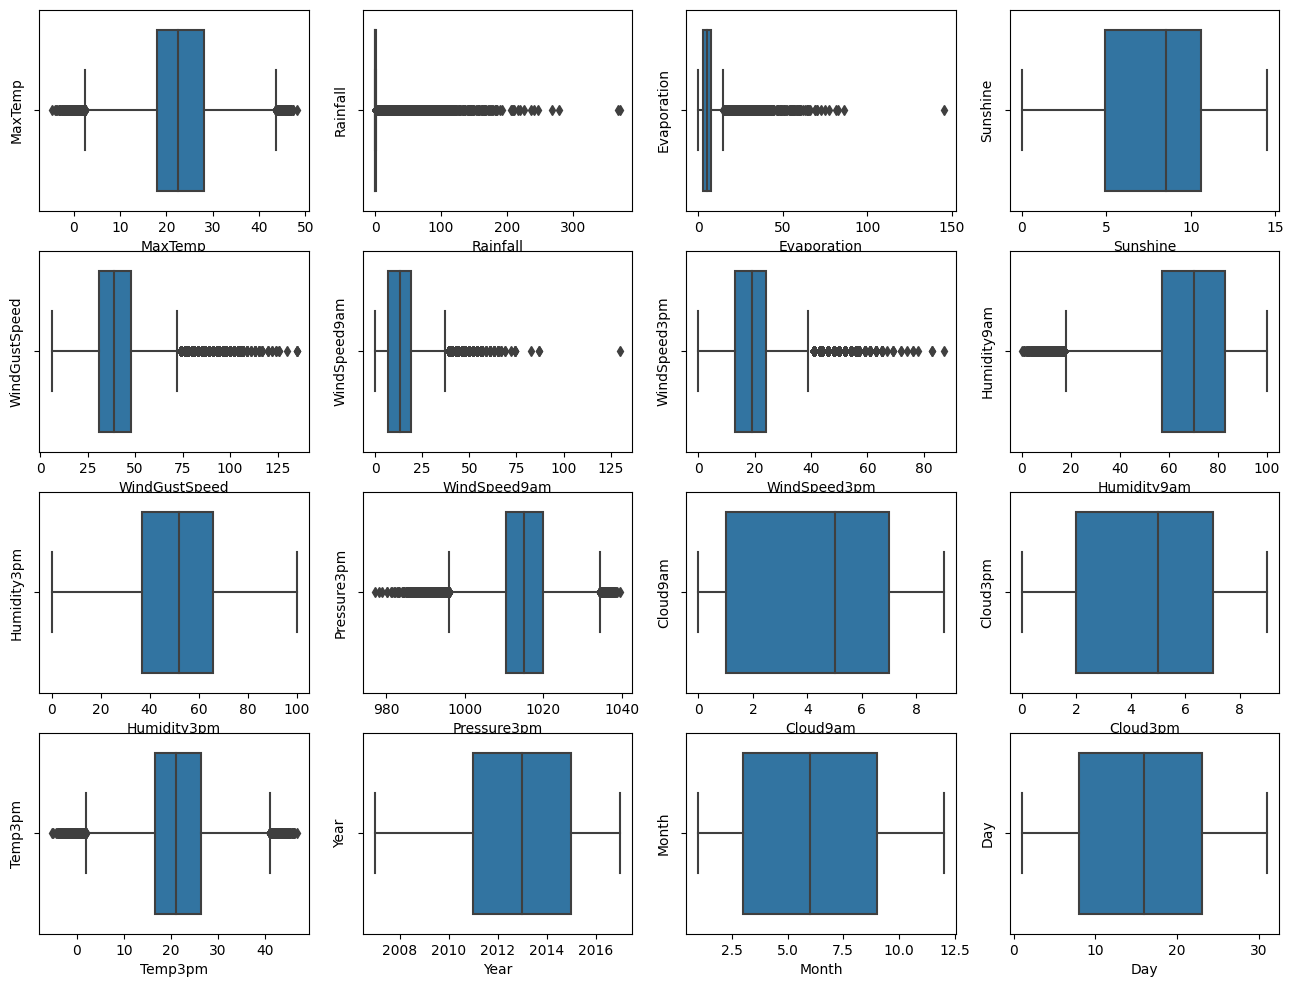

In [50]:
fig, axs = plt.subplots(math.ceil(len(num_cols) / 4),4, figsize=(16,12))
axs = axs.flat
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axs[i])
    axs[i].set_ylabel(col)
    plt
plt.show()

In [51]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

lower_limit = Q1 - 1.5 * (Q3 - Q1)
upper_limit = Q3 + 1.5 * (Q3 - Q1)

df[num_cols] = np.where(df[num_cols] < lower_limit, Q1, df[num_cols])
df[num_cols] = np.where(df[num_cols] > upper_limit, Q3, df[num_cols])

In [52]:
y = df['RainTomorrow']

cate_cols.remove('RainTomorrow')
full_col = num_cols+cate_cols
X = df[full_col].copy()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standard', StandardScaler())
])
cate_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy=('most_frequent'))),
    ('encode', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

processor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cate', cate_transformer, cate_cols)
])

In [55]:
X_train = processor.fit_transform(X_train)
X_test = processor.transform(X_test)

C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
def compare_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    return acc

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Logistic Regression': LogisticRegression(random_state=0, max_iter=1000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=0)
}

Decision Tree Accuracy: 0.7910967333591196
Logistic Regression Accuracy: 0.8482014135518127
Gaussian Naive Bayes Accuracy: 0.6397201026759028
Random Forest Accuracy: 0.8592425894018777


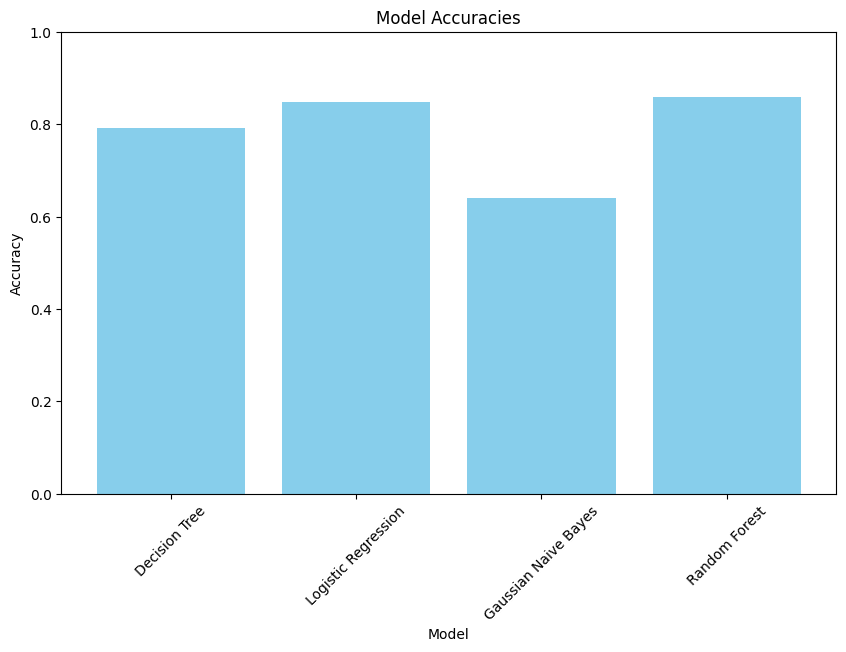

In [58]:
accuracies = {}

for model_name, model in models.items():
    acc = compare_model(model, X_train, X_test, y_train, y_test)
    accuracies[model_name] = acc
    print(f'{model_name} Accuracy: {acc}')

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.title('Model Accuracies')
plt.show()